In [3]:
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
# Funzione per disegnare il grafo
def disegna_grafo(G):
    pos = nx.spring_layout(G)  # Genera una disposizione dei nodi del grafo
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=700, 
            edge_color='k', linewidths=1, font_size=15, 
            arrows=True, arrowsize=20)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

# Algoritmo di Dijkstra

Cammini minimi dalla sorgente: 1
1 -> 1: [1], lunghezza = 0
1 -> 2: [1, 2], lunghezza = 1
1 -> 3: [1, 2, 3], lunghezza = 2
1 -> 4: [1, 2, 4], lunghezza = 3
1 -> 5: [1, 2, 4, 5], lunghezza = 4
1 -> 6: [1, 2, 4, 5, 6], lunghezza = 6


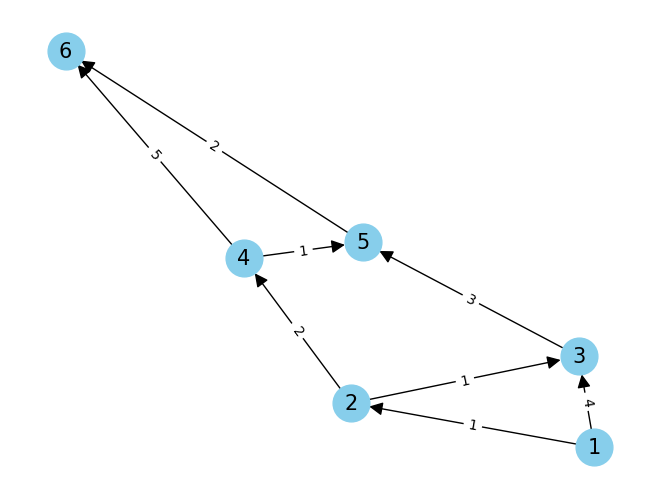

In [5]:
# Creazione di un grafo diretto con pesi
G = nx.DiGraph()
G.add_weighted_edges_from([
    (1, 2, 1), (1, 3, 4), (2, 3, 1), (2, 4, 2), 
    (3, 5, 3), (4, 5, 1), (4, 6, 5), (5, 6, 2)
])

# Utilizzo dell'algoritmo di Dijkstra per trovare il cammino minimo dalla sorgente
sorgente = 1
cammino_minimo = nx.single_source_dijkstra_path(G, sorgente)
lunghezza_cammino = nx.single_source_dijkstra_path_length(G, sorgente)

print("Cammini minimi dalla sorgente:", sorgente)
for destinazione in cammino_minimo:
    print(f"{sorgente} -> {destinazione}: {cammino_minimo[destinazione]}, lunghezza = {lunghezza_cammino[destinazione]}")

disegna_grafo(G)
plt.show()

# Algoritmo di Floyd-Warshall

Lunghezza dei cammini minimi tra tutte le coppie di nodi:
1 -> 2: lunghezza = 1
1 -> 3: lunghezza = 2
1 -> 4: lunghezza = 2
1 -> 5: lunghezza = 4
1 -> 6: lunghezza = 5
2 -> 3: lunghezza = 2
2 -> 4: lunghezza = 2
2 -> 5: lunghezza = 4
2 -> 6: lunghezza = 5
3 -> 5: lunghezza = 3
3 -> 6: lunghezza = 5
4 -> 5: lunghezza = 4
4 -> 6: lunghezza = 5
5 -> 6: lunghezza = 5


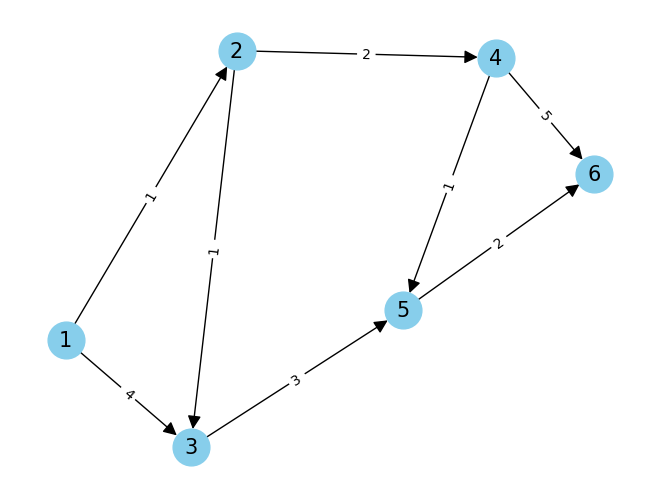

In [7]:
# Utilizzo dell'algoritmo di Floyd-Warshall per trovare tutti i cammini minimi
lunghezza_cammini, cammini = nx.floyd_warshall_predecessor_and_distance(G)

print("Lunghezza dei cammini minimi tra tutte le coppie di nodi:")
for sorgente in lunghezza_cammini:
    for destinazione in lunghezza_cammini[sorgente]:
        print(f"{sorgente} -> {destinazione}: lunghezza = {lunghezza_cammini[sorgente][destinazione]}")

disegna_grafo(G)
plt.show()

In [11]:
class Grafo:
    def __init__(self):
        self.nodi = set()  # Un insieme di nodi
        self.archi = {}  # Dizionario per gli archi, es: {nodo: [(nodo_destinazione, peso), ...]}
    
    def aggiungi_nodo(self, nodo):
        """Aggiunge un nodo al grafo."""
        self.nodi.add(nodo)
    
    def aggiungi_arco(self, sorgente, destinazione, peso):
        """Aggiunge un arco (con peso) al grafo."""
        if sorgente in self.nodi and destinazione in self.nodi:
            if sorgente in self.archi:
                self.archi[sorgente].append((destinazione, peso))
            else:
                self.archi[sorgente] = [(destinazione, peso)]
        else:
            raise ValueError("Sorgente o destinazione non presenti nel grafo")
        
    def stampa_grafo(self):
        for nodo in self.nodi:
            print(f"Nodo {nodo}:")
            if nodo in self.archi:
                for destinazione, peso in self.archi[nodo]:
                    print(f" - verso {destinazione} con peso {peso}")
            else:
                print(" - nessun arco uscente")


In [9]:
def dijkstra(grafo, sorgente):
    distanza = {nodo: float('inf') for nodo in grafo.nodi}
    precedente = {nodo: None for nodo in grafo.nodi}
    distanza[sorgente] = 0
    q = set(grafo.nodi)
    
    while q:
        # Nodo con la distanza minima
        u = min(q, key=lambda nodo: distanza[nodo])
        q.remove(u)
        
        if u not in grafo.archi: continue
        
        for v, peso in grafo.archi[u]:
            alt = distanza[u] + peso
            if alt < distanza[v]:
                distanza[v] = alt
                precedente[v] = u
    
    return distanza, precedente


In [10]:
def floyd_warshall(grafo):
    nodi = list(grafo.nodi)
    distanza = {nodo: {n: float('inf') for n in grafo.nodi} for nodo in grafo.nodi}
    for nodo in grafo.nodi:
        distanza[nodo][nodo] = 0
    
    for u in grafo.archi:
        for v, peso in grafo.archi[u]:
            distanza[u][v] = peso
    
    for k in nodi:
        for i in nodi:
            for j in nodi:
                if distanza[i][k] + distanza[k][j] < distanza[i][j]:
                    distanza[i][j] = distanza[i][k] + distanza[k][j]
    
    return distanza


In [12]:
# Esempio di utilizzo della classe Grafo
grafo = Grafo()
nodi = range(1, 7)
for nodo in nodi:
    grafo.aggiungi_nodo(nodo)

archi = [(1, 2, 1), (1, 3, 4), (2, 3, 1), (2, 4, 2), (3, 5, 3), (4, 5, 1), (4, 6, 5), (5, 6, 2)]
for sorgente, destinazione, peso in archi:
    grafo.aggiungi_arco(sorgente, destinazione, peso)

grafo.stampa_grafo()

Nodo 1:
 - verso 2 con peso 1
 - verso 3 con peso 4
Nodo 2:
 - verso 3 con peso 1
 - verso 4 con peso 2
Nodo 3:
 - verso 5 con peso 3
Nodo 4:
 - verso 5 con peso 1
 - verso 6 con peso 5
Nodo 5:
 - verso 6 con peso 2
Nodo 6:
 - nessun arco uscente


In [13]:
# Esempio Dijkstra
sorgente = 1
distanza, precedente = dijkstra(grafo, sorgente)
print("\nRisultati Dijkstra da sorgente", sorgente)
for nodo in distanza:
    print(f"Distanza da {sorgente} a {nodo}: {distanza[nodo]}, Percorso: ", end="")
    percorso, attuale = [], nodo
    while precedente[attuale] is not None:
        percorso.append(str(attuale))
        attuale = precedente[attuale]
    percorso.append(str(sorgente))
    percorso.reverse()
    print(" -> ".join(percorso))

# Esempio Floyd-Warshall
distanze_fw = floyd_warshall(grafo)
print("\nRisultati Floyd-Warshall:")
for sorgente in distanze_fw:
    for destinazione in distanze_fw[sorgente]:
        print(f"Distanza da {sorgente} a {destinazione}: {distanze_fw[sorgente][destinazione]}")



Risultati Dijkstra da sorgente 1
Distanza da 1 a 1: 0, Percorso: 1
Distanza da 1 a 2: 1, Percorso: 1 -> 2
Distanza da 1 a 3: 2, Percorso: 1 -> 2 -> 3
Distanza da 1 a 4: 3, Percorso: 1 -> 2 -> 4
Distanza da 1 a 5: 4, Percorso: 1 -> 2 -> 4 -> 5
Distanza da 1 a 6: 6, Percorso: 1 -> 2 -> 4 -> 5 -> 6

Risultati Floyd-Warshall:
Distanza da 1 a 1: 0
Distanza da 1 a 2: 1
Distanza da 1 a 3: 2
Distanza da 1 a 4: 3
Distanza da 1 a 5: 4
Distanza da 1 a 6: 6
Distanza da 2 a 1: inf
Distanza da 2 a 2: 0
Distanza da 2 a 3: 1
Distanza da 2 a 4: 2
Distanza da 2 a 5: 3
Distanza da 2 a 6: 5
Distanza da 3 a 1: inf
Distanza da 3 a 2: inf
Distanza da 3 a 3: 0
Distanza da 3 a 4: inf
Distanza da 3 a 5: 3
Distanza da 3 a 6: 5
Distanza da 4 a 1: inf
Distanza da 4 a 2: inf
Distanza da 4 a 3: inf
Distanza da 4 a 4: 0
Distanza da 4 a 5: 1
Distanza da 4 a 6: 3
Distanza da 5 a 1: inf
Distanza da 5 a 2: inf
Distanza da 5 a 3: inf
Distanza da 5 a 4: inf
Distanza da 5 a 5: 0
Distanza da 5 a 6: 2
Distanza da 6 a 1: inf
